#**Problema:**

Prever se a renda de um indivíduo está acima de 50 mil ou não com base nas informações disponíveis no conjunto de dados.

# **Importando as bibliotecas:**

In [3]:

import pandas as pd # manipulação de dados
import numpy as np # álgebra linear
from sklearn.preprocessing import LabelEncoder # Label Encoding
from sklearn.preprocessing import StandardScaler # Normalização
import matplotlib.pyplot as plt # visualização / gráficos
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split # separando dasdos em treino e teste

# Avaliação dos modelos:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

# Algoritmos
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# **Importando dados**





In [4]:
# Importando os dados

df = pd.read_csv('adult.csv', sep=',')

# Transformando a variável resposta em valores binários (0 e 1) - necessário para ajuste dos modelos:

df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [5]:
# Dimensões do data frame:
df.shape


(32561, 15)

In [6]:
# Inspecionando os dados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [7]:
# Resumo dos dados (numéricos):
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#**Pré-processamento**

##**Tratamento de valores ausentes (NAs)**


In [8]:
# Valores ausentes:
valores_nan = df.isna().any()
print(valores_nan)

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool


Não há valores ausentes.

# **Existe de fato alguma relação entre as variáveis?**

É importante termos uma noção da relação entre as variáveis, entendendo se de fato existe algum indício de relacionamento entre as variáveis independentes e variável dependente.
Vamos começar por um gráfico de correlação entre as variáveis numéricas:

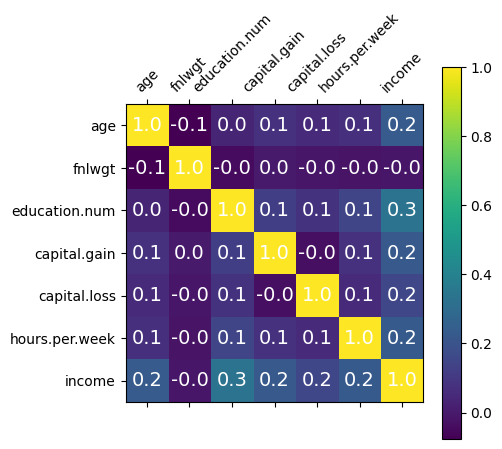

In [9]:
# Filtrar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Criar uma nova matriz de correlação apenas com as colunas numéricas
correlation_matrix = df[numeric_columns].corr()
# Plot da matriz de correlação
plt.matshow(correlation_matrix)
plt.colorbar()  # Adiciona uma barra de cores para referência de valores de correlação
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns.values, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns.values)
for (i, j), corr in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

plt.show()


Analisando a matriz de correlações nota-se que não existe fortes correlações entre a variável resposta e as preditoras, porém ainda assim existe uma correlação mesmo que baixa.
Algo que fica claro aqui, é que não existe uma variável que se destaca em relação as demais, então provavelmente nosso modelo irá trabalhar com pelo menos algumas delas.

## **Outras possibilidades de exploração dos dados e suas relações:**

Poderíamos ainda plotar gráficos individuais mostrando a relação de dependência entre cada variável categórica e nossa variável dependente (income), dentre outras possibilidades.

## **Codificação de Categorias e ajuste de grupos**

Vamos entender melhor as variáveis categóricas, se temos grupos que precisam de ajuste ou substituição de valores:

In [10]:
# Lista de colunas
columns_to_group = [
    'workclass',
    'education',
    'marital.status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native.country',
    'income'
]

# Calculando e imprimindo as contagens para cada coluna
for col in columns_to_group:
    print(f"Contagem para a coluna '{col}':")
    print(df.groupby(col).size())
    print("\n")  # Linha em branco para separar as saídas


Contagem para a coluna 'workclass':
workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
dtype: int64


Contagem para a coluna 'education':
education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64


Contagem para a coluna 'marital.status':
marital.status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
dtype: int64


Cont

Nota-se que o caracter "?" está presente em algumas variáveis, o mesmo pode ser entendido como "NA". Como se trata de uma variável categórica (texto) uma abordagem seria substituir pela MODA da classe, ou agrupar em nova classe (minha escolha), aproveitei juntar grupos com pouca expressão nessa classe.
Outras abordagens possíveis no tratamento de NAs seria a exclusão dessas linhas, ou ainda a exclusão da variável, no entanto, julgo que estariamos perdendo muita informação.

In [11]:
# Substituindo classes pouco expressivas/unificando grupos:

df.loc[df['workclass']=='?','workclass'] = 'Outros'
df.loc[df['workclass']=='Never.worked','workclass'] = 'Outros'
df.loc[df['workclass']=='Without.pay','workclass'] = 'Outros'

df.loc[df['occupation']=='?','occupation'] = 'Outros'
df.loc[df['occupation']=='Armed.Forces','occupation'] = 'Outros'

df.loc[df['race']=='Amer.Indian.Eskimo','race'] = 'Other'

df.loc[df['native.country']=='?','native-country'] = 'Other'
df.loc[df['native.country']=='Holand.Netherlands','native.country'] = 'Other'


## **Label Encoder**

Os modelos que serão testados demandam que todas variáveis contenham valores numéricos, portanto,  precisamos realizar a substituição de nomes por números, o que chamamos "Label encoding".



In [12]:
# Realizo o label encoding em todas colunas não numéricas (=object)
labelencoder = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = labelencoder.fit_transform(df[col])


##**Separando os dasdos em treino e test, X e Y**

In [13]:
# Separando entre X (variáveis independente) e Y (variável dependente):
X = df.drop(['income'], axis=1)
Y = df['income']

# Separando entre treino e teste (usei a proporção de 30% para teste):
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## **Normalização**

As variáveis possuem dados em escalas distintas, o que prejudicaria o ajuste dos modelos, é recomendável a normalização dos dados:

In [14]:
scaler = StandardScaler()

X_teste = pd.DataFrame(scaler.fit_transform(X_teste), columns = X.columns)
X_treino = pd.DataFrame(scaler.transform(X_treino), columns = X.columns)
X_treino



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,native-country
0,0.109838,2.307238,-1.508145,-0.342861,1.136743,-0.415249,-0.807919,2.205899,0.395272,-1.403639,-0.147617,-0.21491,-1.638691,0.28853,0.132281
1,0.036344,-2.200944,0.448368,0.174183,-0.412265,-0.415249,-0.116620,-0.901982,0.395272,0.712434,-0.147617,-0.21491,-0.189685,0.28853,0.132281
2,0.256824,0.053147,0.050108,1.208269,-0.025013,0.909993,-0.807919,-0.280406,0.395272,-1.403639,-0.147617,-0.21491,-0.028685,0.28853,0.132281
3,-0.845576,-2.200944,0.807043,0.174183,-0.412265,0.909993,-0.577486,0.962746,0.395272,0.712434,-0.147617,-0.21491,-0.028685,0.28853,0.132281
4,-0.037149,-2.952308,-0.859363,0.432704,1.523995,-0.415249,-0.807919,-0.901982,0.395272,0.712434,-0.147617,-0.21491,-0.028685,0.28853,0.132281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,3.784507,1.555875,0.885069,1.208269,-0.025013,-0.415249,-0.577486,-0.901982,0.395272,0.712434,-0.147617,-0.21491,-0.028685,0.28853,0.132281
22788,-0.184136,0.053147,0.862385,0.174183,-0.412265,-0.415249,1.726844,-0.901982,0.395272,0.712434,-0.147617,-0.21491,-0.028685,0.28853,0.132281
22789,-0.919070,0.053147,-1.313854,-2.152513,-0.799517,0.909993,1.265978,0.341170,-1.960682,0.712434,-0.147617,-0.21491,0.856818,0.28853,0.132281
22790,0.403811,0.053147,-0.708432,0.432704,1.523995,-0.415249,-0.807919,-0.901982,0.395272,0.712434,-0.147617,-0.21491,-0.028685,0.28853,0.132281


# **Testando diferentes modelos**

## **Decision Tree**

Acurácia no conjunto de treinamento: 0.81
Acurácia no conjunto de teste: 0.81
Precisão no conjunto de teste: 0.81
Recall no conjunto de teste: 0.81
F1-score no conjunto de teste: 0.81
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7410
           1       0.60      0.61      0.60      2359

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



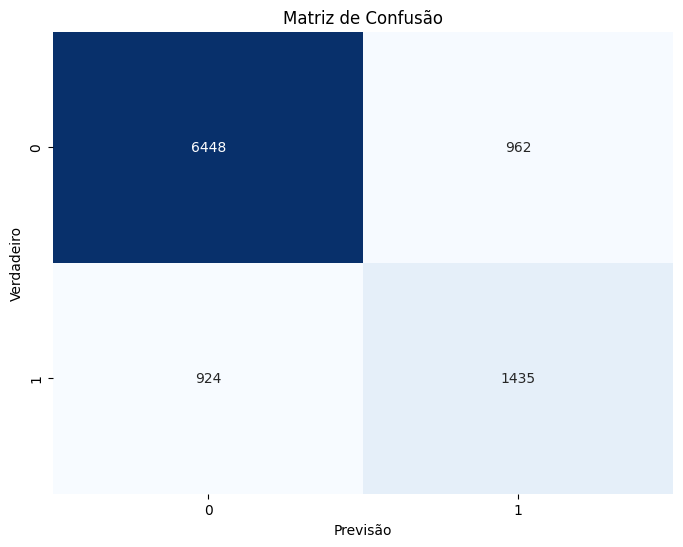

In [15]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_treino, Y_treino)

# Faça previsões no conjunto de teste
y_prediction = decision_tree.predict(X_teste)

# Avalie a acurácia no conjunto de treinamento
acc_decision_tree = decision_tree.score(X_teste, Y_teste)
print(f'Acurácia no conjunto de treinamento: {acc_decision_tree:.2f}')

# Avalie a acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, y_prediction)
precision = precision_score(Y_teste, y_prediction, average='weighted')
recall = recall_score(Y_teste, y_prediction, average='weighted')
f1 = f1_score(Y_teste, y_prediction, average='weighted')
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Recall no conjunto de teste: {recall:.2f}')
print(f'F1-score no conjunto de teste: {f1:.2f}')

# Relatório de classificação
report = classification_report(Y_teste, y_prediction)
print("Relatório de classificação:")
print(report)

# Matriz de confusão
conf_matrix = confusion_matrix(Y_teste, y_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()



## **Random forest**

Acurácia no conjunto de treinamento: 0.86
Acurácia no conjunto de teste: 0.86
Precisão no conjunto de teste: 0.85
Recall no conjunto de teste: 0.86
F1-score no conjunto de teste: 0.85
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7410
           1       0.75      0.61      0.67      2359

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



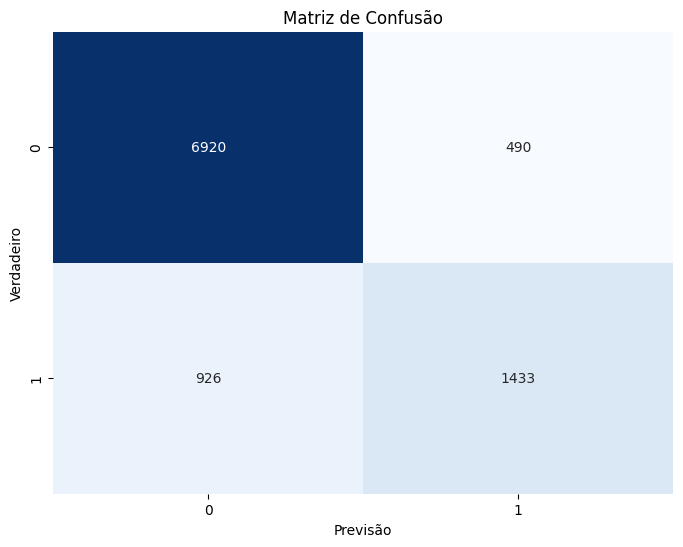

In [16]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_treino, Y_treino)

# Faça previsões no conjunto de teste
y_prediction = random_forest.predict(X_teste)

# Avalie a acurácia no conjunto de treinamento
acc_random_forest = random_forest.score(X_teste, Y_teste)
print(f'Acurácia no conjunto de treinamento: {acc_random_forest:.2f}')

# Avalie a acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, y_prediction)
precision = precision_score(Y_teste, y_prediction, average='weighted')
recall = recall_score(Y_teste, y_prediction, average='weighted')
f1 = f1_score(Y_teste, y_prediction, average='weighted')
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Recall no conjunto de teste: {recall:.2f}')
print(f'F1-score no conjunto de teste: {f1:.2f}')

# Relatório de classificação
report = classification_report(Y_teste, y_prediction)
print("Relatório de classificação:")
print(report)

# Matriz de confusão
conf_matrix = confusion_matrix(Y_teste, y_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

## **Regressão Logística:**

Acurácia no conjunto de treinamento: 0.82
Acurácia no conjunto de teste: 0.82
Precisão no conjunto de teste: 0.81
Recall no conjunto de teste: 0.82
F1-score no conjunto de teste: 0.81
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7410
           1       0.71      0.44      0.54      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



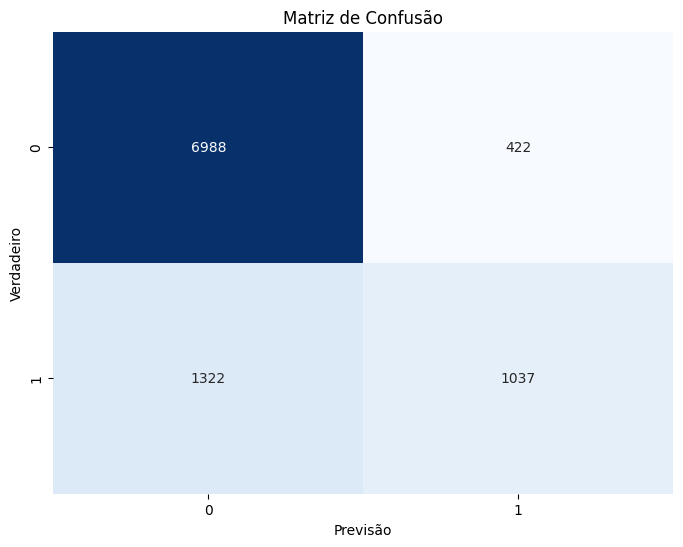

In [17]:
logreg = LogisticRegression()
logreg.fit(X_treino, Y_treino)

# Faça previsões no conjunto de teste
y_prediction = logreg.predict(X_teste)

# Avalie a acurácia no conjunto de treinamento
acc_log = logreg.score(X_teste, Y_teste)
print(f'Acurácia no conjunto de treinamento: {acc_log:.2f}')

# Avalie a acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, y_prediction)
precision = precision_score(Y_teste, y_prediction, average='weighted')
recall = recall_score(Y_teste, y_prediction, average='weighted')
f1 = f1_score(Y_teste, y_prediction, average='weighted')
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Recall no conjunto de teste: {recall:.2f}')
print(f'F1-score no conjunto de teste: {f1:.2f}')

# Relatório de classificação
report = classification_report(Y_teste, y_prediction)
print("Relatório de classificação:")
print(report)

# Matriz de confusão
conf_matrix = confusion_matrix(Y_teste, y_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

## **K-nearest neighbors (KNN)**

Acurácia no conjunto de treinamento: 0.86
Acurácia no conjunto de teste: 0.89
Precisão no conjunto de teste: 0.89
Recall no conjunto de teste: 0.89
F1-score no conjunto de teste: 0.89
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7410
           1       0.80      0.74      0.77      2359

    accuracy                           0.89      9769
   macro avg       0.86      0.84      0.85      9769
weighted avg       0.89      0.89      0.89      9769



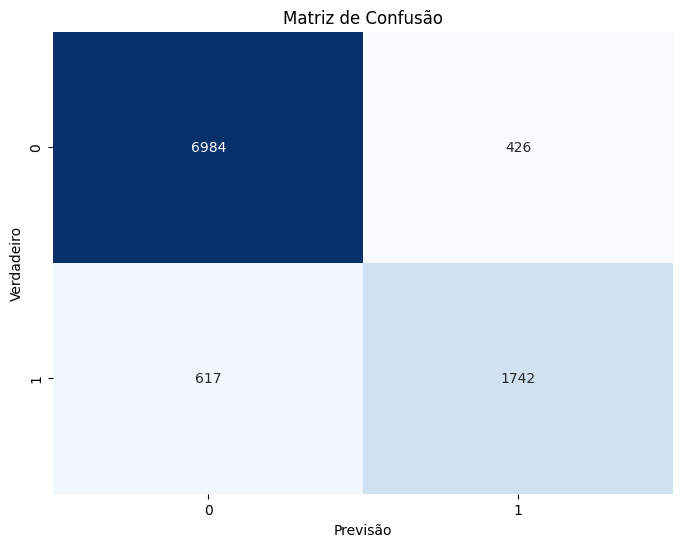

In [18]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_teste, Y_teste)

# Faça previsões no conjunto de teste
y_prediction = knn.predict(X_teste)

# Avalie a acurácia no conjunto de treinamento
acc_knn = knn.score(X_teste, Y_teste)
print(f'Acurácia no conjunto de treinamento: {acc_random_forest:.2f}')

# Avalie a acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, y_prediction)
precision = precision_score(Y_teste, y_prediction, average='weighted')
recall = recall_score(Y_teste, y_prediction, average='weighted')
f1 = f1_score(Y_teste, y_prediction, average='weighted')
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Recall no conjunto de teste: {recall:.2f}')
print(f'F1-score no conjunto de teste: {f1:.2f}')

# Relatório de classificação
report = classification_report(Y_teste, y_prediction)
print("Relatório de classificação:")
print(report)

# Matriz de confusão
conf_matrix = confusion_matrix(Y_teste, y_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


## **Gaussian Naive Bayes:**

Acurácia no conjunto de treinamento: 0.80
Acurácia no conjunto de teste: 0.80
Precisão no conjunto de teste: 0.79
Recall no conjunto de teste: 0.80
F1-score no conjunto de teste: 0.78
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7410
           1       0.69      0.34      0.46      2359

    accuracy                           0.80      9769
   macro avg       0.75      0.65      0.67      9769
weighted avg       0.79      0.80      0.78      9769



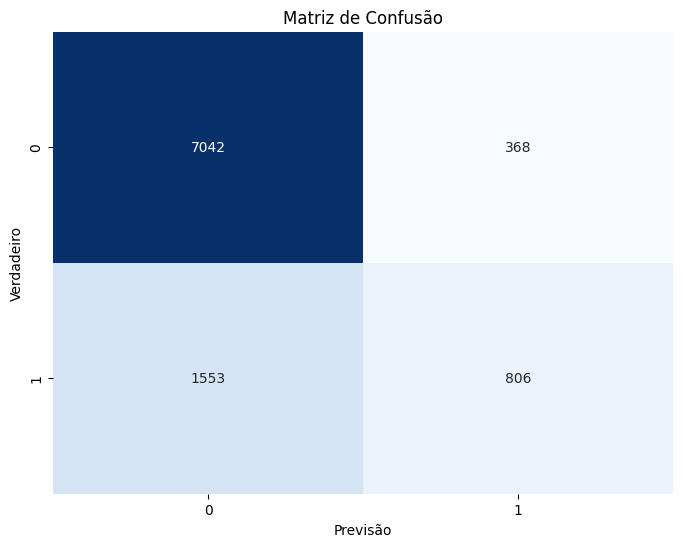

In [19]:
gaussian = GaussianNB()
gaussian.fit(X_treino, Y_treino)

# Faça previsões no conjunto de teste
y_prediction = gaussian.predict(X_teste)

# Avalie a acurácia no conjunto de treinamento
acc_gaussian = gaussian.score(X_teste, Y_teste)
print(f'Acurácia no conjunto de treinamento: {acc_gaussian:.2f}')

# Avalie a acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, y_prediction)
precision = precision_score(Y_teste, y_prediction, average='weighted')
recall = recall_score(Y_teste, y_prediction, average='weighted')
f1 = f1_score(Y_teste, y_prediction, average='weighted')
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Recall no conjunto de teste: {recall:.2f}')
print(f'F1-score no conjunto de teste: {f1:.2f}')

# Relatório de classificação
report = classification_report(Y_teste, y_prediction)
print("Relatório de classificação:")
print(report)

# Matriz de confusão
conf_matrix = confusion_matrix(Y_teste, y_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

## **Support Vector Machine (SVM):**


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acurácia no conjunto de treinamento: 0.82
Acurácia no conjunto de teste: 0.82
Precisão no conjunto de teste: 0.81
Recall no conjunto de teste: 0.82
F1-score no conjunto de teste: 0.80
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7410
           1       0.74      0.41      0.52      2359

    accuracy                           0.82      9769
   macro avg       0.79      0.68      0.71      9769
weighted avg       0.81      0.82      0.80      9769



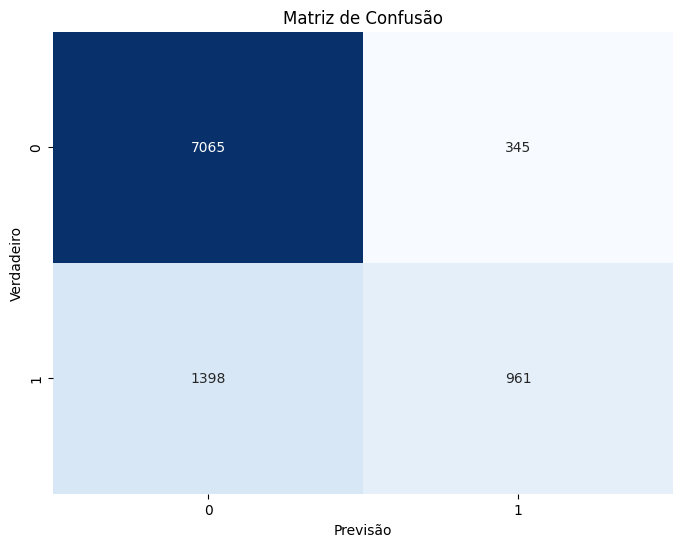

In [20]:
linear_svc = LinearSVC()
linear_svc.fit(X_treino, Y_treino)

# Faça previsões no conjunto de teste
y_prediction = linear_svc.predict(X_teste)

# Avalie a acurácia no conjunto de treinamento
acc_svc = linear_svc.score(X_teste, Y_teste)
print(f'Acurácia no conjunto de treinamento: {acc_svc:.2f}')

# Avalie a acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, y_prediction)
precision = precision_score(Y_teste, y_prediction, average='weighted')
recall = recall_score(Y_teste, y_prediction, average='weighted')
f1 = f1_score(Y_teste, y_prediction, average='weighted')
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Recall no conjunto de teste: {recall:.2f}')
print(f'F1-score no conjunto de teste: {f1:.2f}')

# Relatório de classificação
report = classification_report(Y_teste, y_prediction)
print("Relatório de classificação:")
print(report)

# Matriz de confusão
conf_matrix = confusion_matrix(Y_teste, y_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


# **Modelo final escolhido: K-nearest neighbors (KNN)**

Usando como base a medida F1-score, o modelo vencedor foi K-nearest neighbors, conseguindo um F1-score de 0,89.

É importante analisar as métricas por classe, nesse caso para classe "<=50K" (0) e ">50K" (1). Note que os modelos Random Forest tiveram um F1-score muito alto para a classe "<=50K", porém baixo F1-score para ">50K", o que penalisou o F1-score geral. Se ficar confuso olhar as tabelas, analise a matriz de confusão gráfica.

In [21]:
# Convertenddo novamente a variável income de binário para rótulo original:

y_prediction = knn.predict(X_teste)
y_prediction = ['<=50K' if x == 0 else '>50K' for x in y_prediction]

print(y_prediction)


['<=50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '>50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', 

# **Concluindo**

Entendemos o problema proposto, importamos os dados, exploramos os dados, realizamos a limpeza e tratamentos dos dados, ou seja todo processo de ETL e mais um pouco. Sem seguida testamos diferentes modelos e avaliamos os mesmos, por fim elegemos um modelo como o melhor para nossos dados. Agora temos um modelo treinado, capaz de ser utilizado com certa confiabilidade (admitindo uma margem de erro conhecida).
Agora temos um modelo pronto para entrar em produção, em uma situação real, seria possível utilizar dados de clientes e/ou público alvo, para prever a renda provável deste cliente, ou do público alvo (para saber por exemplo, se este seria um cliente em potencial).